In [1]:
import tensorflow as tf
import numpy as np
from tfswin import SwinTransformer
import gymnasium as gym
from gymnasium.wrappers import AtariPreprocessing, FrameStack

2023-03-30 15:52:02.960025: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 15:52:03.603971: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def make_env(env_name="ALE/Pong-v5", seed=42):
    env = gym.make(env_name, render_mode="rgb_array", full_action_space=False, frameskip=1)
    env = AtariPreprocessing(env)
    # env = RecordEpisodeStatistics(env)
    env = FrameStack(env, 4)
    env.observation_space.seed(seed)
    env.action_space.seed(seed)

    return env

env = make_env()
state, _ = env.reset()
state = np.array(state)
state = np.expand_dims(state, 0)
state = tf.transpose(state, (0, 2, 3, 1))
state

<tf.Tensor: shape=(1, 84, 84, 4), dtype=uint8, numpy=
array([[[[ 52,  52,  52,  52],
         [ 52,  52,  52,  52],
         [ 52,  52,  52,  52],
         ...,
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87]],

        [[ 87,  87,  87,  87],
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87],
         ...,
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87]],

        [[ 87,  87,  87,  87],
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87],
         ...,
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87],
         [ 87,  87,  87,  87]],

        ...,

        [[236, 236, 236, 236],
         [236, 236, 236, 236],
         [236, 236, 236, 236],
         ...,
         [236, 236, 236, 236],
         [236, 236, 236, 236],
         [236, 236, 236, 236]],

        [[236, 236, 236, 236],
         [236, 236, 236, 236],
         [236, 236, 236, 236],
         ...,
         [236, 23

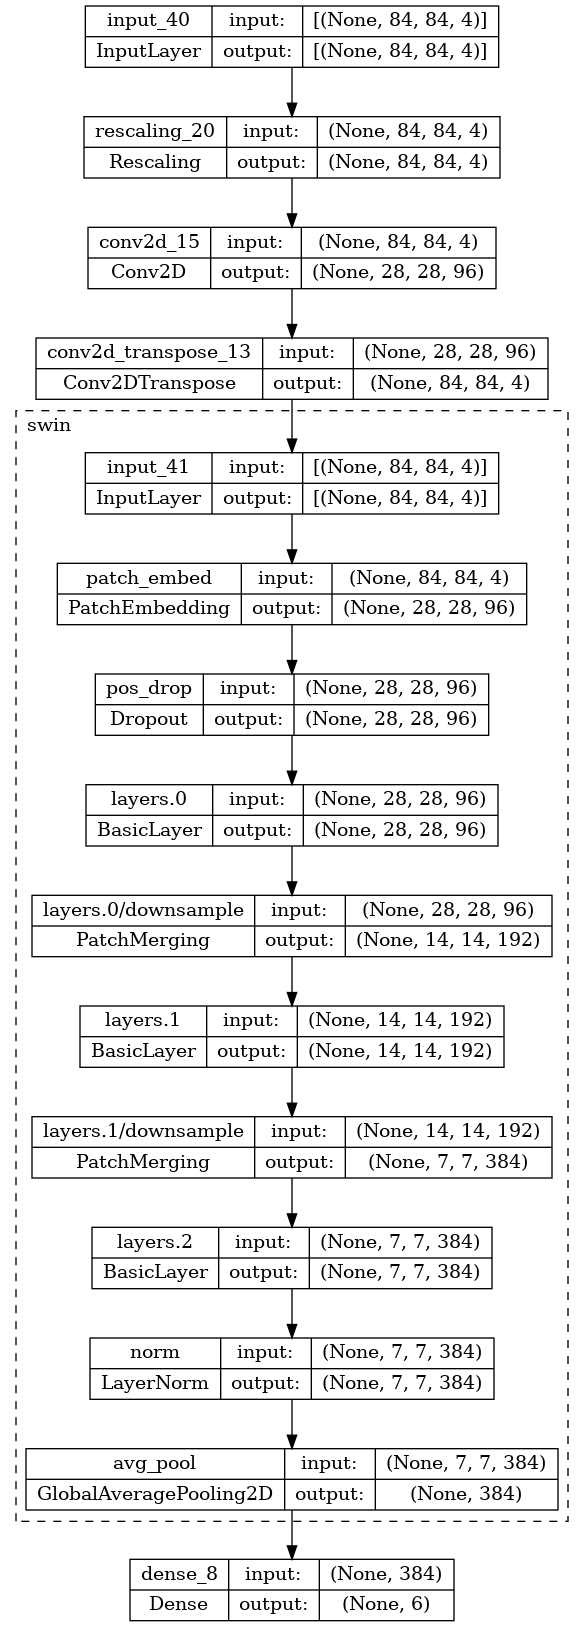

In [24]:
inputs = tf.keras.layers.Input(shape=(84, 84, 4))
rescaled = tf.keras.layers.Rescaling(scale=1.0 / 255)(inputs)
conv = tf.keras.layers.Conv2D(96, 3, strides=3, activation="relu")(rescaled)
transpose = tf.keras.layers.Conv2DTranspose(4, 3, strides=3, activation="relu")(conv)
swin = SwinTransformer(pretrain_size=84, include_top=False, patch_size=3, embed_dim=96, depths=[2, 3, 2], num_heads=[3, 3, 6], window_size=7, mlp_ratio=4.0, path_drop=0.1, input_shape=(84, 84, 4), pooling="avg")(transpose)
outputs = tf.keras.layers.Dense(6, activation="linear")(swin)

# 784

model = tf.keras.Model(inputs=inputs, outputs=outputs)
#model.build((1, 84, 84, 4))
#model.summary(expand_nested=True)
# model.get_config()
tf.keras.utils.plot_model(model, "model.png", show_shapes=True, expand_nested=True)
#
# result = model(state)
# result

configuration = SwinConfig(
     image_size=84,
     patch_size=3,
     num_channels=4,
     embed_dim=96,
     depths=[2, 3, 2],
     num_heads=[3, 3, 6],
     window_size=7,
     mlp_ratio=4.0,
     drop_path_rate=0.1,
)

from keras import layers, models
from tfswin import SwinTransformerTiny224, preprocess_input

inputs = layers.Input(shape=(224, 224, 3), dtype='uint8')
outputs = layers.Lambda(preprocess_input)(inputs)
outputs = SwinTransformerTiny224(include_top=False)(outputs)
outputs = layers.Dense(100, activation='softmax')(outputs)

model = models.Model(inputs=inputs, outputs=outputs)
model.compile(...)
model.fit(...)